# Estudo dos dados do PENSE

O estudo realizado nesse Notebook objetiva fazer uma análise dos dados do PENSE (Pesquisa Nacional de Saúde do Escolar), que investiga informações que permitem conhecer e dimensionar os fatores de risco e proteção à saúde dos adolescentes. A pesquisa é realizada por amostragem, utilizando como referência para seleção o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira - INEP.  

Nesta edição, que é de 2015, importantes inovações foram introduzidas na pesquisa, dentre as quais se destaca a disponibilização de informações oriundas de dois planos amostrais distintos: escolares frequentando o 9o ano do ensino fundamental e escolares de 13 a 17 anos de idade frequentando as etapas do 6o ao 9o ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio, que essa segunda amostra é a que será utilizada nesse estudo. A segunda amostra, por sua vez, proporciona melhor identificação e acompanhamento de fatores relacionados ao desenvolvimento físico-biológico e ao tempo de exposição às condições de risco para o grupo etário considerado, e viabiliza maior comparabilidade com indicadores internacionais, em especial aqueles provenientes da OMS.

## Objetivo da análise

## Metodologia

## Construção do DataFrame e Tratamento dos dados

O Site do IBGE disponibiliza os dados em Zip para fazer o download. O download foi feito e colocado no Drive para os arquivos serem usados diretamente do Drive.


### Importação dos dados e bibliotecas

In [1]:
# importação de bibliotecas que serão usadas

from zipfile import ZipFile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch




In [2]:
path = "/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(path)
caminho_pasta_zipada = zip.namelist()[1]

In [3]:
dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands=".", decimal=",")

In [4]:
dados.head(5)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [6]:
dados.describe()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
count,16556.0,16556.0,16556.000000,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,...,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16511.000000,16509.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,2015.0,76.0,3.012443,1.0,1.499456,2.698417,14.095917,6.529778,6.497886,1.177821,1.456088,5.521442,4.472457,1.932774,-0.658976,1.630527,1.237739,1.367480,1.311790,1.514073,1.782556,2.646895,1.983027,3.811851,2.061669,2.059737,2.202404,4.418277,2.930539,5.677700,3.132762,4.819220,4.791737,4.47747,4.002054,2.233692,3.396654,2.449505,1.855762,1.530503,...,3.256040,2.685794,3.301643,2.672807,2.617420,4.024583,2.473967,1.851776,3.165257,2.645446,2.823750,5.126782,2.082085,0.57073,2.645023,2.712129,2.066018,2.461404,2.400821,2.295240,2.138802,2.408009,2.413989,2.469014,720.067167,1707.824944,54.705581,160.713113,1.940324,2.333474,3095.650459,3.012443,1144.868891,1.051401,1.252174,2.671781,-0.341024,8278.500000,186.053938,320.036241
std,0.0,0.0,1.414031,0.0,0.500015,3.868506,2.127947,4.210372,4.016313,2.542142,2.976776,4.843260,3.235230,2.846333,1.887961,3.423028,3.242986,3.422951,3.335345,3.589203,3.328680,2.834142,3.391287,2.973932,1.951140,5.510869,4.944444,3.140680,3.147671,5.076772,4.987270,5.019093,5.200573,5.14835,4.629152,4.148241,3.550049,3.240009,2.906492,3.686487,...,11.317482,9.399305,10.124933,6.210680,6.677625,6.102175,10.018074,7.598201,11.359404,8.084829,10.074287,12.213946,9.550399,6.16366,9.097973,9.245862,6.856720,6.812536,6.820812,6.833927,6.850322,6.819859,6.819060,6.811458,1237.323409,1078.777096,14.547864,10.340070,0.236893,0.685435,1443.400564,1.414031,1133.068244,0.220822,0.434274,0.872426,1.282048,4779.449864,107.358284,186.022453
min,2015.0,76.0,1.000000,1.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.800000,124.100000,1.000000,1.000000,311.000000,1.000000,24.213647,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
25%,2015.0,76.0,2.000000,1.0,1.000000,1.000000,12.000000,4.000000,5.000000,1.000000,1.00000

### Checagem e tratamento dos dados

In [7]:
# Checar se existem dados NaN do DataFrame

dados.isna().sum().sum()

432

In [8]:
# Checagem das colunas com NaN

colunas_nan = dados.loc[:, dados.isnull().any()].columns
colunas_nan

Index(['TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST',
       'VB17001', 'VB17002'],
      dtype='object')

In [9]:
# Mostrar somente as linhas com dados NaN

df_nan = dados[dados.isnull().T.any()]
df_nan.sample(8)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
12888,2015,76,4,1,1,1,13,1,8,1,2,1,3,2,-1,2,1,1,2,1,1,2,2,1,3,2,2,1,3,7,2,1,4,8,8,5,6,1,4,1,...,99,99,99,1,1,4,99,-1,99,99,99,-1,99,-1,99,99,99,99,99,99,99,99,99,99,NaN,NaN,39.5,145.1,1,2,4123,4,1062.617635,1,1,2,-1,12889,290,345
10468,2015,76,4,1,1,1,12,1,9,1,2,3,5,2,-1,1,1,1,1,1,1,2,1,1,3,2,2,5,5,5,4,1,8,1,4,1,1,1,4,1,...,2,2,3,5,3,4,2,-1,3,3,1,-1,2,-1,2,2,2,2,1,2,2,2,2,2,385.0,1515.0,38.5,151.5,2,2,4123,4,824.812220,1,1,2,-1,10469,231,632
15481,2015,76,5,1,2,4,14,8,6,1,2,6,4,2,-1,2,1,1,1,1,2,2,2,4,3,2,2,5,3,4,3,1,8,1,5,5,1,5,5,1,...,99,99,99,1,2,4,99,-1,99,99,99,-1,99,99,2,99,2,2,1,2,1,2,1,2,423.0,1516.0,42.3,151.6,2,2,5123,5,430.003095,2,1,2,-1,15482,351,152
10946,2015,76,4,1,1,2,15,5,6,1,1,1,6,2,-1,2,1,2,2,2,2,2,2,2,1,2,2,6,5,2,3,6,3,3,7,1,1,1,-1,3,...,99,99,3,1,1,4,99,-1,99,1,2,-1,99,-1,99,99,2,2,2,2,2,1,2,2,601.0,1736.0,60.1,173.6,2,2,4121,4,595.398546,1,1,2,-1,10947,242,639
12061,2015,76,4,1,2,1,12,9,8,1,2,3,4,2,-1,2,1,1,2,1,2,3,2,2,1,99,2,6,3,8,2,8,3,8,2,1,6,1,4,1,...,2,1,1,1,2,4,1,99,1,1,99,99,1,1,2,2,1,2,2,2,2,2,2,2,336.0,1501.0,33.6,150.1,2,2,4111,4,1267.663688,1,1,3,-1,12062,268,547
15826,2015,76,5,1,1,4,13,10,7,1,2,99,2,99,-1,99,99,99,99,99,99,99,99,3,1,2,2,4,3,99,99,99,99,99,99,99,99,99,-1,99,...,99,99,99,99,99,99,99,-1,99,99,99,-1,99,-1,99,99,99,99,99,99,99,99,99,99,NaN,NaN,41.7,152.5,1,2,5223,5,224.776142,1,2,4,4,15827,357,84
6490,2015,76,2,1,2,4,16,3,5,1,1,1,4,2,-1,1,1,1,1,1,2,2,2,6,1,2,2,5,3,3,2,5,7,1,6,1,1,5,-1,2,...,99,99,4,99,99,4,1,2,3,4,2,-1,99,2,99,2,2,2,2,2,1,2,2,2,488.0,1606.0,48.8,160.6,2,2,2223,2,803.237902,1,2,4,1,6491,146,87
6039,2015,76,2,1,2,2,11,1,10,1,2,5,4,1,2,2,1,2,1,2,2,2,2,1,3,2,2,2,3,4,2,5,1,3,1,1,5,5,4,1,...,99,99,99,4,4,1,99,-1,99,99,99,-1,99,99,99,99,99,99,99,99,99,99,99,99,NaN,NaN,62.3,159.0,1,4,2123,2,644.845474,1,1,2,-1,6040,137,54


In [10]:
# Mostrar onde temos dados NaN

df_nan[colunas_nan].isna().sum()

TEMPODESLOC     33
TEMPOTOTAL      20
TEMPOEDFIS      84
TEMPOEXTRA      93
TEMPOEST       110
VB17001         45
VB17002         47
dtype: int64

In [11]:
df_nan[colunas_nan].sample(8)

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002
14396,115.0,125.0,10.0,0.0,NaN,404.0,1617.0
10468,350.0,805.0,NaN,455.0,NaN,385.0,1515.0
10264,245.0,245.0,NaN,0.0,NaN,765.0,1760.0
10932,90.0,90.0,NaN,NaN,NaN,656.0,1649.0
10020,0.0,130.0,130.0,NaN,NaN,472.0,1512.0
15340,0.0,135.0,135.0,0.0,NaN,325.0,1524.0
2118,40.0,40.0,0.0,0.0,0.0,NaN,NaN
10657,0.0,0.0,NaN,NaN,NaN,998.0,998.0


Ao ver as colunas com dados NaN, cheguei ao problema de compreender o que as perguntas significam, uma vez que em alguns casos são conjuntos de letras e números para especificar a pergunta.

#### Facilitando a compreensão das perguntas

Com a criação de funções

In [12]:
excel = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/Dicionario_PENSE_Microdados_AMOSTRA2.xls'

dados_excel = pd.read_excel(excel)

In [13]:
# Montar o dicionario de codigo da coluna e qual é a pergunta referente ao código

dados_excel.set_index('VARIÁVEL', inplace = True)
dicionario_perguntas = {}
colunas_perguntas = list(dados.columns)

for i in colunas_perguntas:
  dicionario_perguntas[i] = dados_excel.loc[i][0]


# Definição de uma função para mostrar qual a pergunta referente ao código da coluna

def qual_a_pergunta(codigo : str):
  return print("A pergunta do código {} é: '{}'.".format(codigo,dicionario_perguntas[codigo]))

In [14]:

# Montar o dicionário das respostas das perguntas!
dados_excel.reset_index(inplace=True)
dicionario_respostas = {}
lista_indexes = []

# A função abaixo monta uma lista com o index das linhas do arquivo excel, em que temos perguntas

for variavel in dados_excel["VARIÁVEL"]:
  if variavel in colunas_perguntas:
    lista_indexes.append(dados_excel.query(f"VARIÁVEL == '{variavel}'").index[0])


''' 
Essa parte do código faz um looping dentro do range da quantidade de dados
da lista montada anteriormente. Cada vez que ela itera ela usa o valor daquele número inteiro
dentro daquela lista de indexes, assim se o primeiro index for o 5, ele na primeira interação
busca o index 5 com a função loc, porém como só quero as respostas, adicionamos +1 ao index
para buscar somente as respostas. Para delimitar ele busca no próximo item da lista de indexes
qual é o index e dessa vez substrai 1 do valor para selecionar somente os items dessa uma
única resposta. Assim atribui esse dataframe à uma variavel à um dicionário que foi 
adicionado no dicionário definido nessa célula como dicionario_respostas
'''

for i in range(len(lista_indexes)+1):
  if i == 180:
    dict_temp = dados_excel.loc[lista_indexes[i]+1:].set_index("VARIÁVEL")
    dict_temp = dict_temp.rename(columns ={'QUESTIONÁRIO DO ALUNO':dados_excel.loc[lista_indexes[i]][0]}).to_dict()  
  else:
    try:
      dict_temp = dados_excel.loc[lista_indexes[i]+1:lista_indexes[i+1]-1].set_index("VARIÁVEL")
      dict_temp = dict_temp.rename(columns ={'QUESTIONÁRIO DO ALUNO':dados_excel.loc[lista_indexes[i]][0]}).to_dict()
    except Exception:
      pass

  dicionario_respostas.update(dict_temp)

# Definição da função para retornar como são as respostas daquele código

def como_respostas(codigo:str):
  if dicionario_respostas[codigo] == {}:
    print("Resposta impossível de classificar") 
  else:
    return  dicionario_respostas[codigo]

In [15]:
# A ideia dessa função é mostrar o que aquela código de coluna significa,
#mostrando a pergunta, e as possíveis respostas.

def descricao_pergunta(coluna : str):
  qual_a_pergunta(codigo = coluna)
  if dicionario_respostas[coluna] == {}:
    print("As respostas não foram possíveis de classificar, verifique diretamente no DataFrame")
  else:
    print("Respostas:")
    return dicionario_respostas[coluna]

In [16]:
descricao_pergunta("VB01004")

A pergunta do código VB01004 é: 'Qual é o mês do seu aniversário?'.
Respostas:


{1: 'Janeiro',
 2: 'Fevereiro',
 3: 'Março',
 4: 'Abril',
 5: 'Maio',
 6: 'Junho',
 7: 'Julho',
 8: 'Agosto',
 9: 'Setembro',
 10: 'Outubro',
 11: 'Novembro',
 12: 'Dezembro',
 99: 'Não informado'}

In [17]:
dicionario_respostas["VB01002"]

{'1': 'Branca',
 '2': 'Preta',
 '3': 'Amarela',
 '4': 'Parda',
 '5': 'Indígena',
 99: 'Não informado'}

In [18]:
qual_a_pergunta(dados.columns[57])

A pergunta do código VB03011A é: 'NOS ÚLTIMOS 7 DIAS, em quantos dias você fez atividade física por pelo menos 60 minutos (1 hora) por dia? (Some todo o tempo que você gastou em qualquer tipo de atividade física EM CADA DIA)'.


### Checagem e tratamento dos dados pt.2

In [19]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [20]:
dados["IMC"] = (dados["VB17003"]/(dados["VB17004"]/100)**2).round(2)

In [21]:
# Além do indice número, também utilizarei as nomeclaturas

classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo","normal", "sobrepeso", "obesidade"]

dados["classe_IMC"] = pd.cut(x = dados["IMC"], 
                             bins = classes,
                             labels = labels,
                             include_lowest = True)

In [22]:
dados[["IMC","classe_IMC"]]

,IMC,classe_IMC
0,15.05,abaixo
1,21.73,normal
2,18.50,abaixo
3,23.32,normal
4,28.12,sobrepeso
...,...,...
16551,20.11,normal
16552,17.93,abaixo
16553,23.97,normal
16554,19.00,normal


## Análise Exploratória

In [23]:
dados.describe()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,IMC
count,16556.0,16556.0,16556.000000,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,...,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.00000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16511.000000,16509.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,2015.0,76.0,3.012443,1.0,1.499456,2.698417,14.095917,6.529778,6.497886,1.177821,1.456088,5.521442,4.472457,1.932774,-0.658976,1.630527,1.237739,1.367480,1.311790,1.514073,1.782556,2.646895,1.983027,3.811851,2.061669,2.059737,2.202404,4.418277,2.930539,5.677700,3.132762,4.819220,4.791737,4.47747,4.002054,2.233692,3.396654,2.449505,1.855762,1.530503,...,2.685794,3.301643,2.672807,2.617420,4.024583,2.473967,1.851776,3.165257,2.645446,2.823750,5.126782,2.082085,0.57073,2.645023,2.712129,2.066018,2.461404,2.400821,2.295240,2.138802,2.408009,2.413989,2.469014,720.067167,1707.824944,54.705581,160.713113,1.940324,2.333474,3095.650459,3.012443,1144.868891,1.051401,1.252174,2.671781,-0.341024,8278.500000,186.053938,320.036241,20.958237
std,0.0,0.0,1.414031,0.0,0.500015,3.868506,2.127947,4.210372,4.016313,2.542142,2.976776,4.843260,3.235230,2.846333,1.887961,3.423028,3.242986,3.422951,3.335345,3.589203,3.328680,2.834142,3.391287,2.973932,1.951140,5.510869,4.944444,3.140680,3.147671,5.076772,4.987270,5.019093,5.200573,5.14835,4.629152,4.148241,3.550049,3.240009,2.906492,3.686487,...,9.399305,10.124933,6.210680,6.677625,6.102175,10.018074,7.598201,11.359404,8.084829,10.074287,12.213946,9.550399,6.16366,9.097973,9.245862,6.856720,6.812536,6.820812,6.833927,6.850322,6.819859,6.819060,6.811458,1237.323409,1078.777096,14.547864,10.340070,0.236893,0.685435,1443.400564,1.414031,1133.068244,0.220822,0.434274,0.872426,1.282048,4779.449864,107.358284,186.022453,4.244454
min,2015.0,76.0,1.000000,1.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.800000,124.100000,1.000000,1.000000,311.000000,1.000000,24.213647,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.400000
25%,2015.0,76.0,2.000000,1.0,1.000000,1.000000,12.000000,4.000000,5.000000,1.000000,1.000000,3.

In [24]:
# Distribuição de participantes por sexo
def dist_valor(coluna:str):
  dist = pd.DataFrame(dados[coluna].value_counts(normalize = True)*100)
  dist.index = dist.index.astype("string")
  dist.rename(index= dicionario_respostas[coluna], columns = dicionario_perguntas, inplace=True)
  dist.rename(index = {'99' :"Não Informado"}, inplace = True)
  return dist


In [25]:
# Cruzamento de dados

def cruzar_dados(indice, colunas, normalizado = None):
  if normalizado == None:
    cruzado = pd.DataFrame(pd.crosstab(dados[indice], dados[colunas],
                                       margins=True, margins_name="Total"))
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)
    cruzado.index = cruzado.index.astype("string")
    cruzado.columns = cruzado.columns.astype("string")
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)

  elif normalizado != None:
    cruzado = pd.DataFrame(pd.crosstab(dados[indice], dados[colunas], 
                                         normalize= normalizado,
                                         margins=True, margins_name="Total"))*100
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)
    cruzado.index = cruzado.index.astype("string")
    cruzado.columns = cruzado.columns.astype("string")
    cruzado.rename(index = dicionario_respostas[indice], columns = dicionario_respostas[colunas], inplace = True)

  else:
    cruzado = print("Erro")
  
  return cruzado

In [26]:
dist_valor("VB01002")

,Qual é a sua cor ou raça?
Parda,40.625755
Branca,39.713699
Preta,11.711766
Amarela,4.300556
Indígena,3.509302
Não Informado,0.138922


In [27]:
cruzar_dados("VB01002","VB01001", "columns")

VB01001,Masculino,Feminino,Total
VB01002,,,
Branca,41.341861,38.081993,39.713699
Preta,13.334138,10.085863,11.711766
Amarela,3.644262,4.958278,4.300556
Parda,37.830337,43.427258,40.625755
Indígena,3.704598,3.313581,3.509302
Não informado,0.144805,0.133027,0.138922


In [28]:
sns.set_theme(style = 'darkgrid')

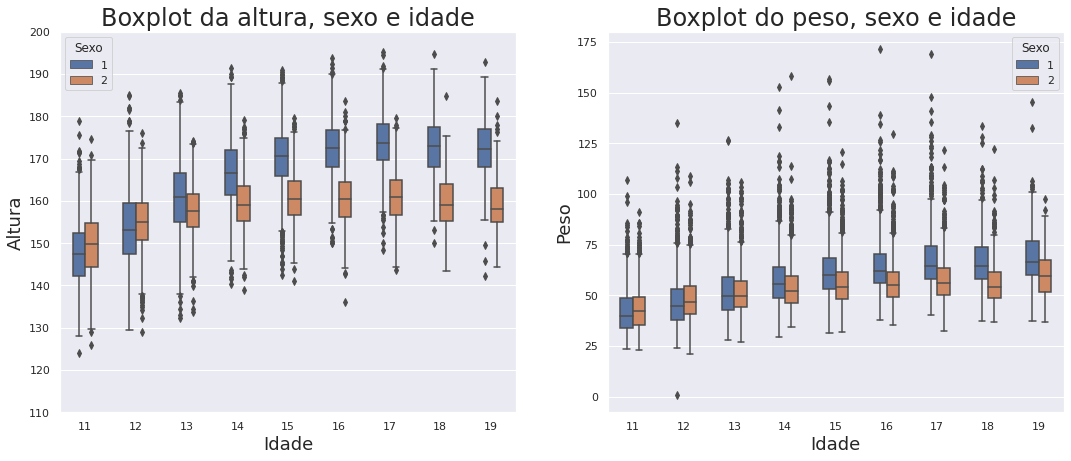

In [29]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
ax = sns.boxplot(data = dados, y = "VB17004",x = "VB01003", hue="VB01001", width = 0.5)
ax.set_title("Boxplot da altura, sexo e idade",fontsize = 24)
ax.set_ylabel("Altura", fontsize = 18)
ax.set_xlabel("Idade", fontsize = 18)
ax.set_ylim(110,200)
plt.legend(title = "Sexo")

plt.subplot(1,2,2)
ax1 = sns.boxplot(data = dados, y = "VB17003",x = "VB01003", hue="VB01001", width = 0.5)
ax1.set_title("Boxplot do peso, sexo e idade", fontsize = 24)
ax1.set_ylabel("Peso", fontsize = 18)
ax1.set_xlabel("Idade", fontsize = 18)
plt.legend(title = "Sexo")

plt.show()

Nos dois plots de cima vemos que a altura e peso entre alunos do sexo masculino são diferentes em suas curvas, tanto na sua crescente quanto na distribuição total. Quando analisamos de todos os dados. Vemos que o peso, altura dos jovens do sexo masculino tendem a ser curvas com valores maiores.

Os dados levando em consideração a idade seguem a mesma tendência, onde o sexo masculino tem valores mais altos em sua maioria, porém tanto no peso quanto na altura, os valores do sexo femino são maiores, porém após isso os dois apresentam crescimento continuo porém o do sexo masculino é mais acentuado.

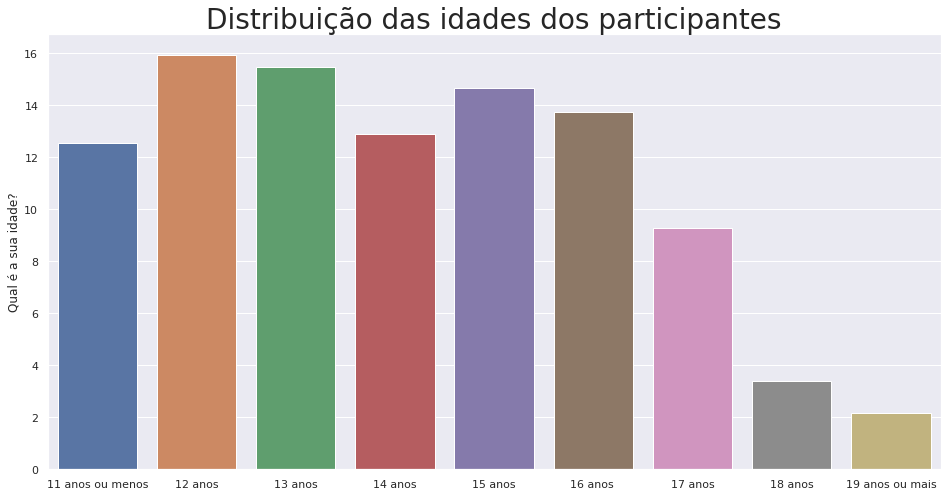

In [30]:
# Distribuição simples da idade dos participantes

df_temp = dist_valor("VB01003").round(2).sort_index()

ax = sns.barplot(x=df_temp.index, y = df_temp[df_temp.columns[0]])
ax.set_title("Distribuição das idades dos participantes", fontsize = 28)
ax.figure.set_size_inches(16,8)

Como a pesquisa é feita justamente de alunos do 6º ao 9º ano no ensino fundamental e do 1º ao 3º ano do ensino médio, os números não foram surpreendentes, uma vez que o 6º ano a idade dos alunos geralmente variam entre 10 e 12 anos e a idade mais comum de término do ensino médio é de 17 anos, mas tbm pode variar entre 16 à 18 anos. Esses números não são levando em consideração possíveis reprovações, mas somente a sequencia adequada das séries.

## Estudo de dados sobre desigualdade racial

Agora minha intenção é separar os dados de participantes Brancos e participantes de outras Cores/Raças para comparar como questões de raça podem refletir nas respostas apresentadas aqui nesse questionário.

Abaixo seguem alguns artigos e livros que falam sobre racismo, discriminação e desigualdade racial:


[Quem é negro, quem é branco: desempenho escolar e classificação racial de alunos](https://www.scielo.br/scielo.php?pid=S1413-24782005000100007&script=sci_arttext&tlng=pt)


[Do silêncio do lar ao silêncio escolar: racismo, preconceito e discriminação na educação infantil](https://books.google.ch/books?hl=en&lr=&id=f9VnAwAAQBAJ&oi=fnd&pg=PT6&dq=racismo+escola&ots=1avLSA_xza&sig=WpLp4bkLXGCb00P_vqJUqOyL2oo)

[Desigualdade racial, racismo e seus efeitos](https://www.scielo.br/scielo.php?pid=S1984-02922012000300009&script=sci_arttext&tlng=pt)

[Racismo implícito: um olhar para a educação infantil](https://educere.bruc.com.br/CD2011/pdf/5643_3318.pdf)

[Racismo e educação: um conflito constante](http://www.contemporanea.ufscar.br/index.php/contemporanea/article/view/302)

As categorias que as perguntas serão analisadas comparando como os participantes de diferentes cores ou raças responderam serão:

- Situação socioeconômica;
- Drogas Ilícitas;
- Situações em Casa;
- Situações na Escola;
- Saúde Mental;
- Saúde Sexual;
- Violência Física;
- Violência Sexual;


### Preparação do estudo

In [31]:
# Criação de dois DataFrames, um somente com os participantes Brancos
#e o outro de todos as outras raças

dados_brancos = dados[dados["VB01002"] == 1].copy()
dados_racas = dados[dados["VB01002"] != 99].copy()
dados_pretos_e_pardos = dados.query("VB01002 == 2 | VB01002 == 4").copy()


In [32]:
dicionario_raca = {'1': 'Branca',
                   '2': 'Preta',
                   '3': 'Amarela',
                   '4': 'Parda',
                   '5': 'Indígena'}

dados_racas['raca'] = dados_racas["VB01002"].map(lambda x: dicionario_raca[str(x)])
dados_racas['raca'].unique()

array(['Branca', 'Parda', 'Amarela', 'Indígena', 'Preta'], dtype=object)

In [33]:
cruzar_dados("VB01002","VB01003","columns")

VB01003,11 anos ou menos,12 anos,13 anos,14 anos,15 anos,16 anos,17 anos,18 anos,19 anos ou mais,Total
VB01002,,,,,,,,,,
Branca,45.270270,39.521640,37.446310,36.990155,42.103093,40.616740,39.622642,36.234458,25.484765,39.713699
Preta,10.231660,11.731207,11.128465,12.798875,10.639175,12.158590,12.036435,15.985790,14.127424,11.711766
Amarela,3.812741,5.353075,4.139008,4.828880,4.371134,3.700441,4.163956,2.841918,3.601108,4.300556
Parda,34.893822,38.496583,43.108161,41.772152,40.536082,40.881057,42.550423,42.273535,52.908587,40.625755
Indígena,5.405405,4.669704,3.982819,3.563057,2.309278,2.643172,1.561483,2.486679,3.878116,3.509302
Não informado,0.386100,0.227790,0.195236,0.046882,0.041237,0.000000,0.065062,0.177620,0.000000,0.138922


A distribuição das respostas por idade e raça só muda quando são alunos de 19 anos ou mais. Que já pode ser considerado um ponto de reflexão, uma vez que alunos com essa idade são alunos que repetiram alguma vez um ano escolar.


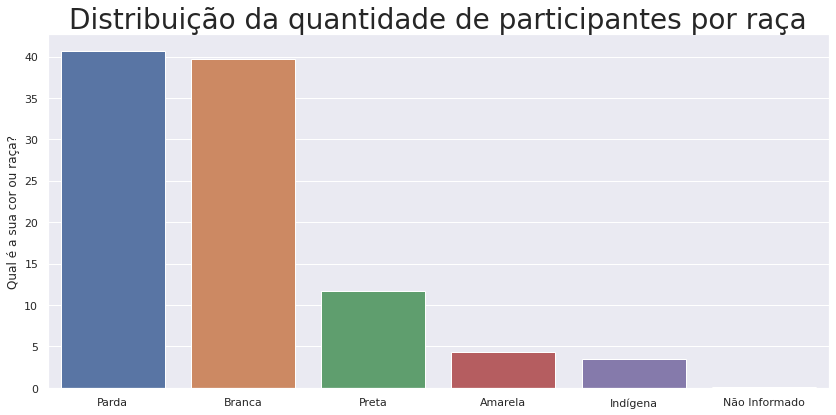

In [34]:
# Distribuição simples da raça dos participantes

df_temp = dist_valor("VB01002").round(2)

ax = sns.barplot(x=df_temp.index, y = df_temp[df_temp.columns[0]])
ax.set_title("Distribuição da quantidade de participantes por raça", fontsize = 28)
ax.figure.set_size_inches(14,6.5)

Pela quantidade tão baixa de participantes "Não-informados" os mesmos não serão contabilizados.

In [35]:
colors = ['tab:blue','tab:orange','tab:green','tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan',
          'black', 'palegreen', 'deeppink', 'gold', 'bisque']

In [36]:
def comparacao_barra_norm(pergunta:str, valor_comparado:str, titulo = None,
                          bbox = None, tamanho = None):
  x = pergunta
  y = 'Porcentagem'
  qtde = len(dados_racas[x].unique())
  hue = valor_comparado
  legend_elements = []

  prop_df = (dados_racas[x]
            .groupby(dados_racas[hue])
            .value_counts(normalize=True)
            .rename(y)
            .reset_index())

  ax = sns.barplot(x=hue, y=y, hue=x, data=prop_df, 
                  palette=colors)

  if tamanho == None:
    ax.figure.set_size_inches(14,6)
  else:
    ax.figure.set_size_inches(tamanho)

  for i in range(len(dados_racas[x].unique())):
    labels = list(dicionario_respostas[x].values())
    temp = Patch(facecolor= colors[i], edgecolor='w', label= labels[i])
    legend_elements.append(temp)
  
  ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))
  ax.set_ylabel(y, fontsize = 22)
  ax.set_xlabel("Raça", fontsize = 22)
  plt.xticks(fontsize = 16)
  plt.yticks(fontsize = 14)

  if bbox == None:
    ax.legend(handles=legend_elements, bbox_to_anchor= (1,1), fontsize = 12)

  else:
    ax.legend(handles=legend_elements, bbox_to_anchor= bbox, fontsize = 12)
    
  if titulo == None:
    ax.set_title(dicionario_perguntas[x], fontsize = 28)
  else:
    ax.set_title(titulo, fontsize = 28)
  

  plt.show()


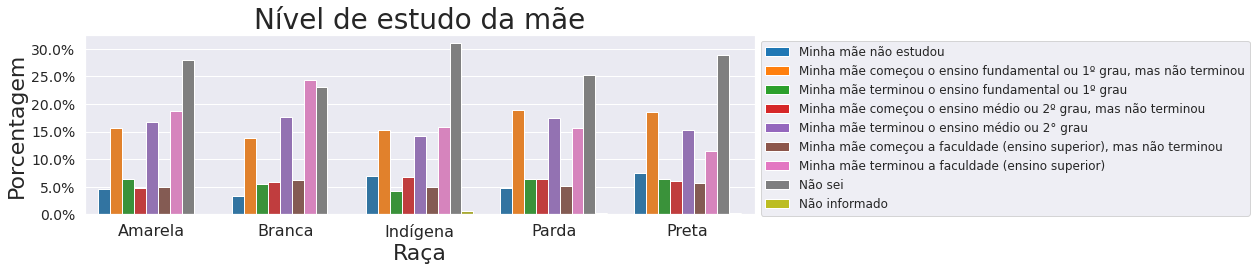

In [37]:
# Teste de aplicação da função

comparacao_barra_norm("VB01008A","raca", "Nível de estudo da mãe", tamanho = (12,3.3))

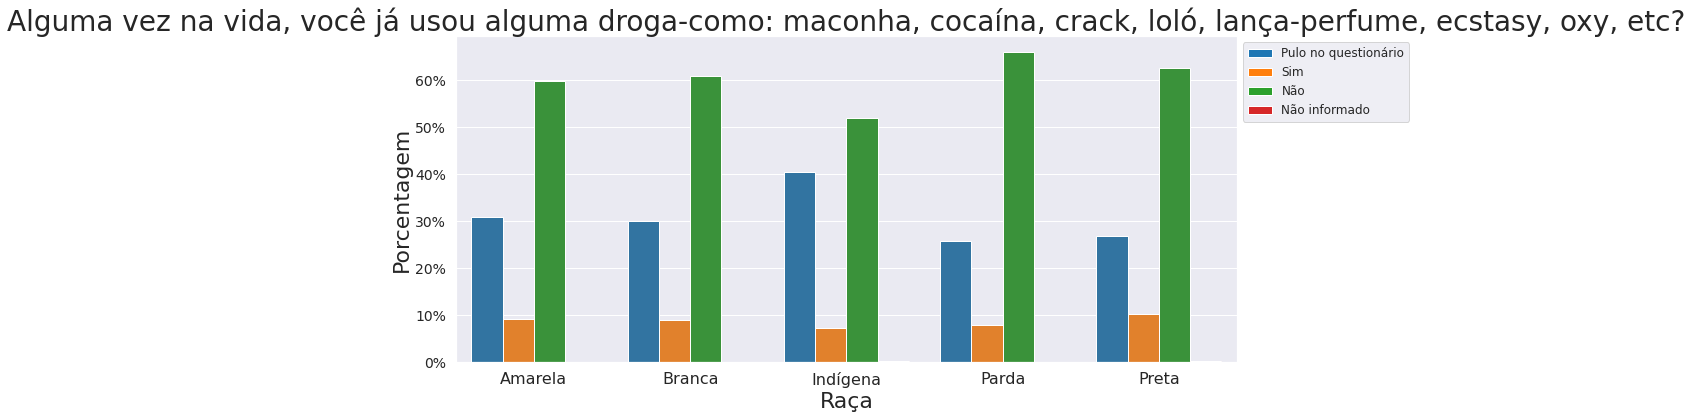

In [38]:
# Teste de aplicação da função

comparacao_barra_norm("VB06001","raca")

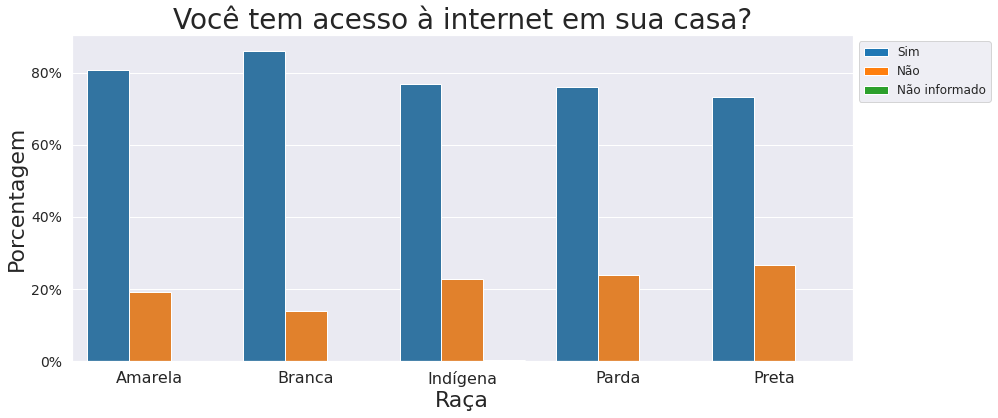

In [39]:
# Teste de aplicação da função

comparacao_barra_norm("VB01016","raca", bbox=(1,1))

### Situação socioeconômica

No questionário existem algumas perguntas sobre alguns bens materiais. A intenção dessas perguntas é medir o nivel socioeconômica dos alunos respondentes. 

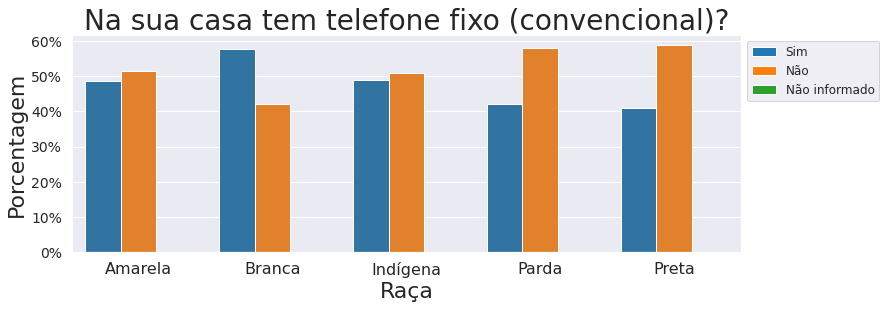

In [40]:
comparacao_barra_norm("VB01013","raca", tamanho=(12,4))

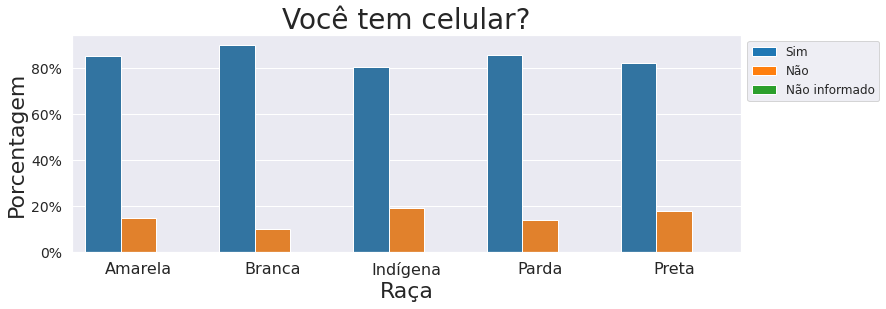

In [41]:
comparacao_barra_norm("VB01014","raca", tamanho=(12,4))

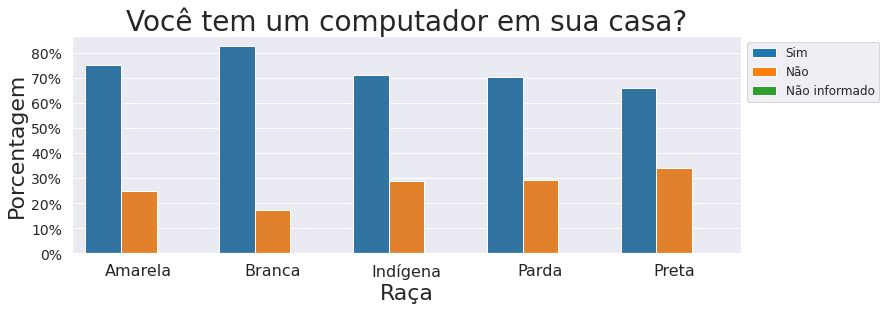

In [42]:
comparacao_barra_norm("VB01015A","raca", tamanho=(12,4),titulo="Você tem um computador em sua casa?")

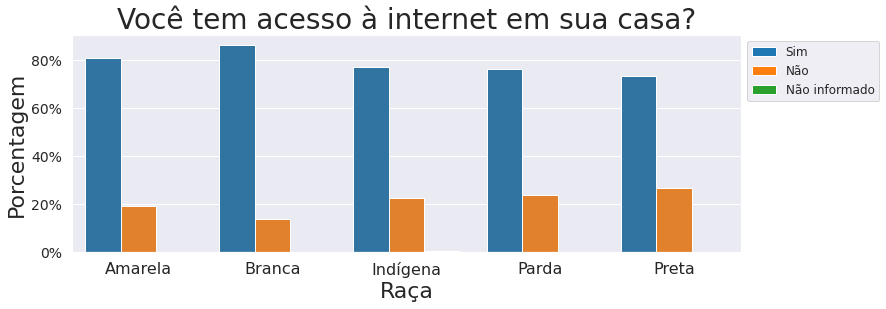

In [43]:
comparacao_barra_norm("VB01016","raca", tamanho=(12,4)) 

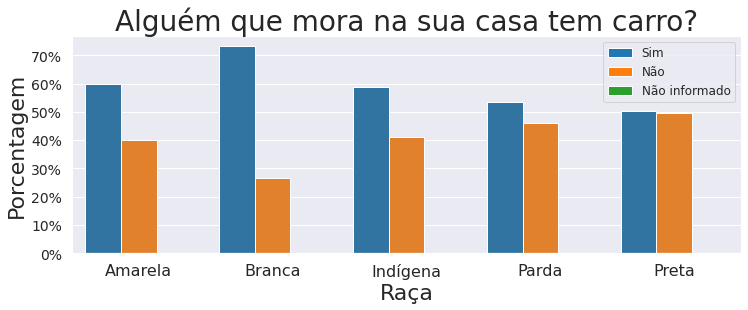

In [44]:
comparacao_barra_norm("VB01017","raca", tamanho=(12,4))

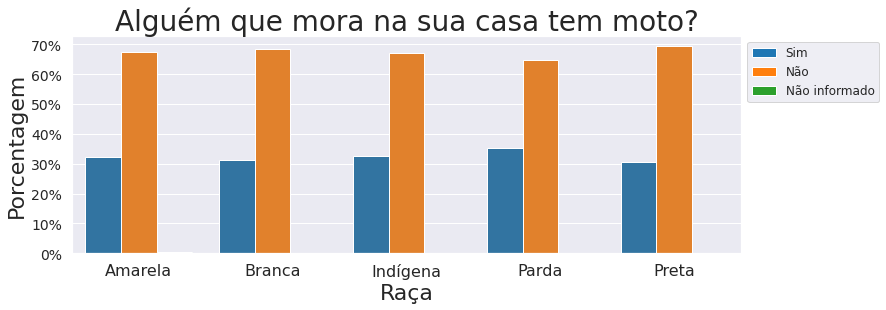

In [45]:
comparacao_barra_norm("VB01018","raca", tamanho=(12,4))

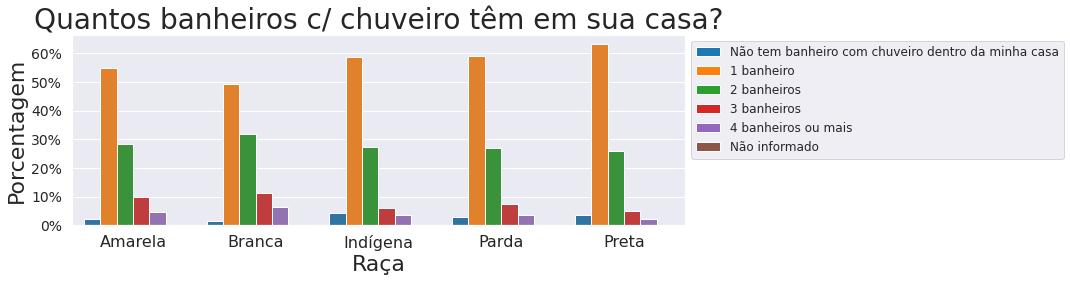

In [46]:
comparacao_barra_norm("VB01019","raca", 'Quantos banheiros c/ chuveiro têm em sua casa?' , tamanho=(11,3.5))

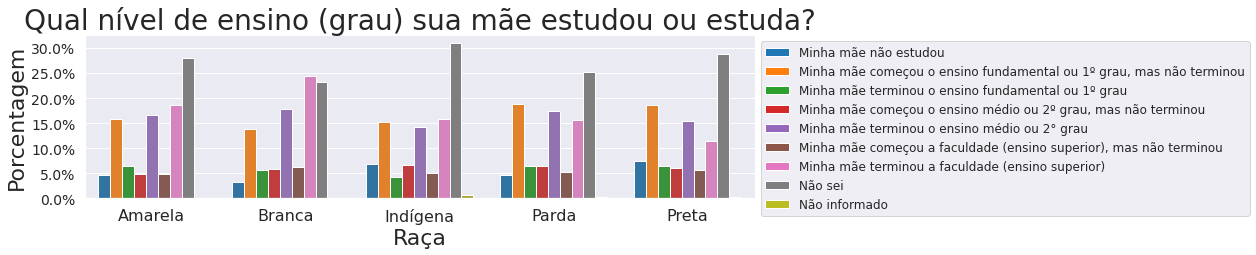

In [54]:
comparacao_barra_norm("VB01008A","raca", tamanho=(12,3))

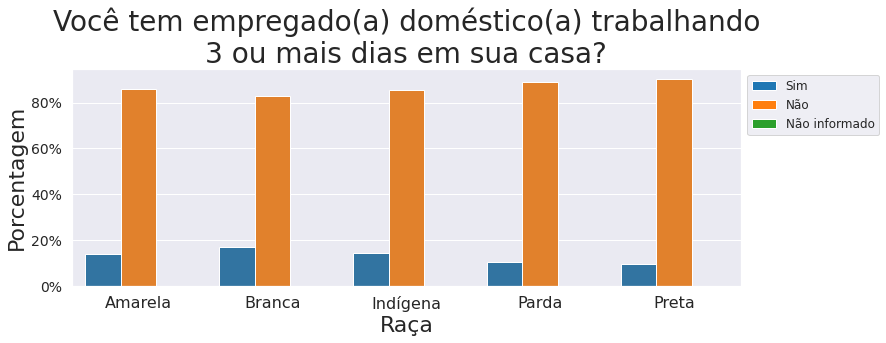

In [47]:
comparacao_barra_norm("VB01020A","raca", 
                      titulo="Você tem empregado(a) doméstico(a) trabalhando\n3 ou mais dias em sua casa?",
                      tamanho=(12,4))

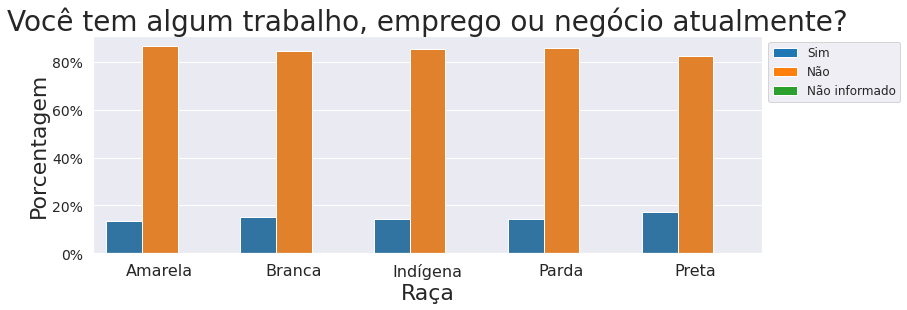

In [48]:
comparacao_barra_norm("VB01011","raca", tamanho=(12,4))

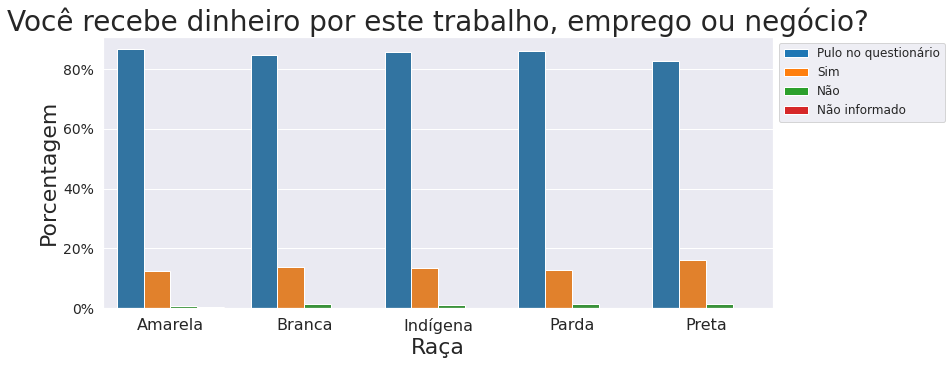

In [49]:
comparacao_barra_norm("VB01012","raca", tamanho=(12,5))

A grande maioria das perguntas colocados aqui, colocam em cheque a situação que Indígenas, Pardos(as) e Pretos(as) tem condições socioeconomicas menos favoraveis que Brancos(as) e Amarelos(as). 

As perguntas abaixo tem valores de % muito próximos: 
- Ter emprego; 
- Ser um emprego assalariado; 
- Ter uma motocicleta.

Em algumas perguntas é possível ver sinais mais fortes de desigualdade, como: 
- Alguém da casa ter um carro; 
- Acesso à Internet em casa; 
- Ter um computador em casa; 
- Ter um telefone fixo na casa;
- Nível de estudo da mãe.

### Drogas Ilícitas

### Situações em Casa

### Situações na Escola

### Saúde Mental

### Saúde Sexual

###Violência Física

### Violência Sexual

##Rascunho

In [50]:
##################
#### RASCUNHO ####
##################

In [51]:
dist_valor("VB01002")

,Qual é a sua cor ou raça?
Parda,40.625755
Branca,39.713699
Preta,11.711766
Amarela,4.300556
Indígena,3.509302
Não Informado,0.138922
